In [1]:
# Importing Neccessary Libraries to perform EDA 
import pandas as pd
import numpy as np

In [2]:
#read the CSV with an alternative encoding other than UTF-8 
df = pd.read_csv('superstore.csv', encoding='ISO-8859-1')

In [3]:
df.shape # To get the shape pf

(9994, 21)

In [4]:
df.head() #Get the first 5 elements of the dataset 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Inspection the dataset SuperStore

In [6]:
# Summary of the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
# Descriptive statistics for numerical columns
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


#### Handling Missing values

In [8]:

# Check for missing values in each column
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
# Drop rows with missing values (if a small percentage of data is missing) 
df_clean = df.dropna()

In [10]:
# Check for duplicate rows
print(df.duplicated().sum())

# Drop duplicate rows
df_clean = df.drop_duplicates()


0


In [11]:
#DATA TYPE CONVERSTION 

# Convert 'Order Date' and 'Ship Date' columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Convert categorical variables to category type
categorical_columns = ['Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
df[categorical_columns] = df[categorical_columns].astype('category')


#### Handling outliers 


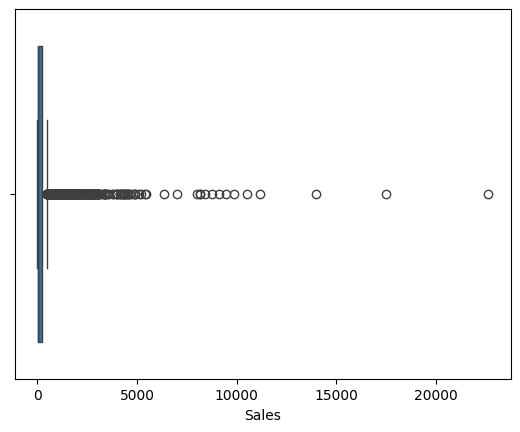

In [12]:
#  Visualize Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'Sales'
sns.boxplot(x=df['Sales'])
plt.show()




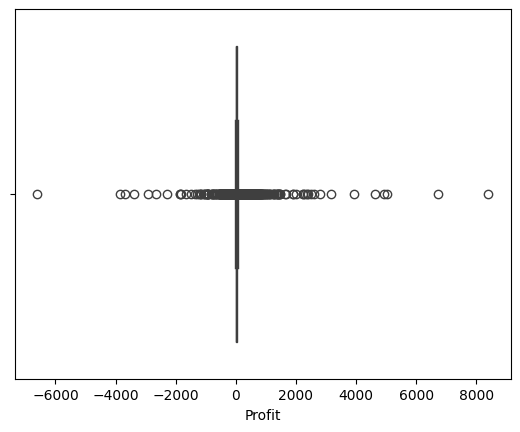

In [13]:
# Boxplot for 'Profit'
sns.boxplot(x=df['Profit'])
plt.show()

In [14]:
# Remove outliers based on 'Sales' and 'Profit' (using Interquartile Range method)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_clean = df[~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]


#### Performing UNIVARIATE EDA 

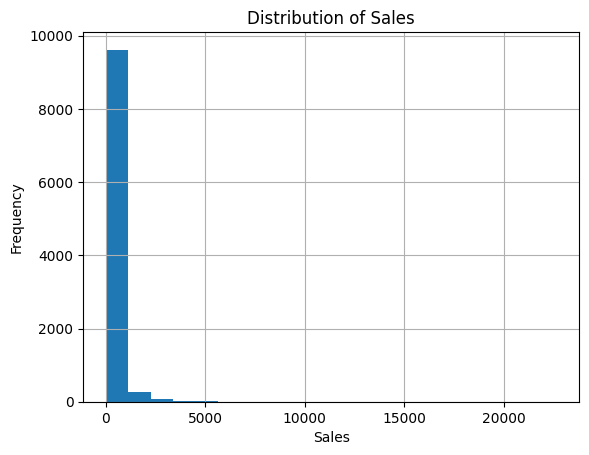

In [15]:
# Histogram for 'Sales'
df['Sales'].hist(bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()




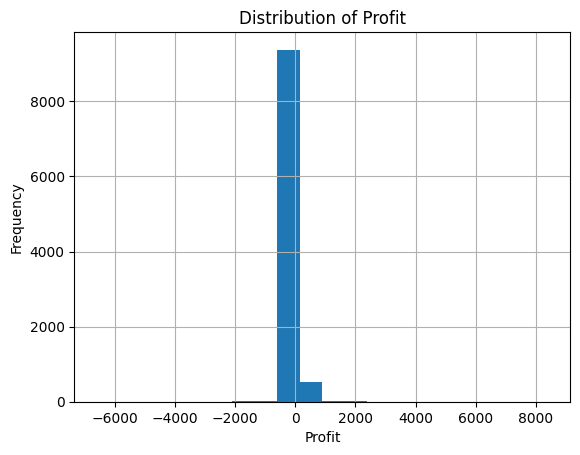

In [16]:
# Histogram for 'Profit'
df['Profit'].hist(bins=20)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

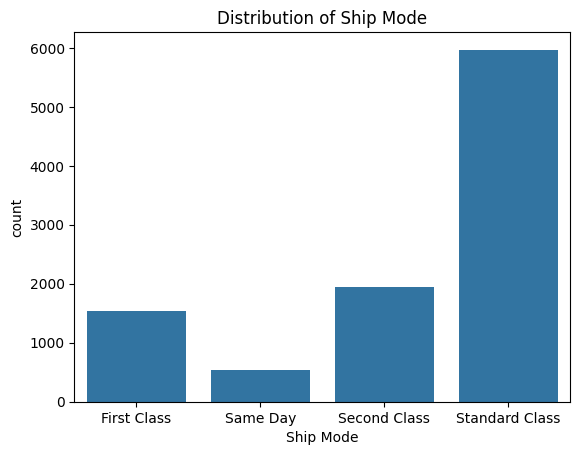

In [17]:
# Count plot for 'Ship Mode'
sns.countplot(x='Ship Mode', data=df)
plt.title('Distribution of Ship Mode')
plt.show()



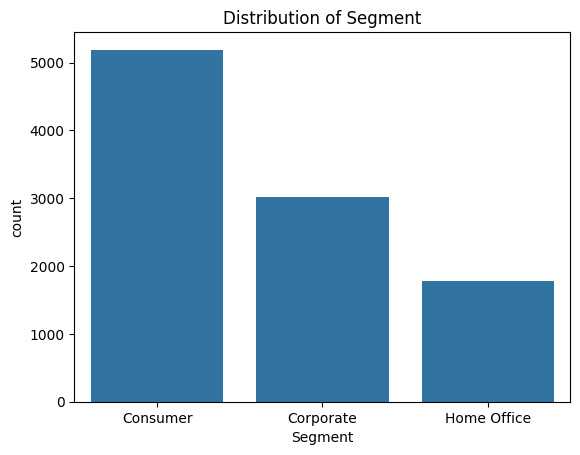

In [18]:
# Count plot for 'Segment'
sns.countplot(x='Segment', data=df)
plt.title('Distribution of Segment')
plt.show()


#### Bivariate EDA 

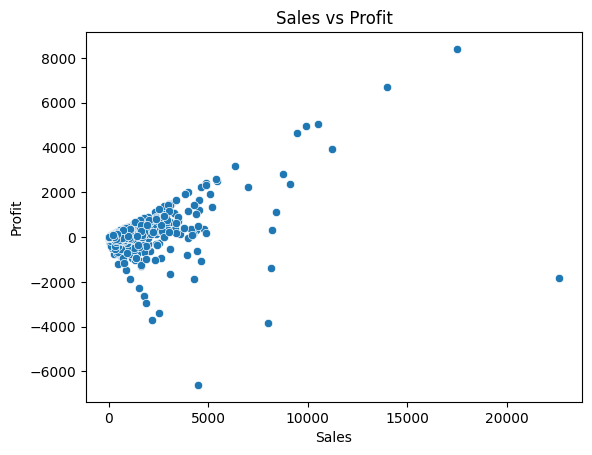

In [19]:
# Scatter plot between 'Sales' and 'Profit'
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.show()


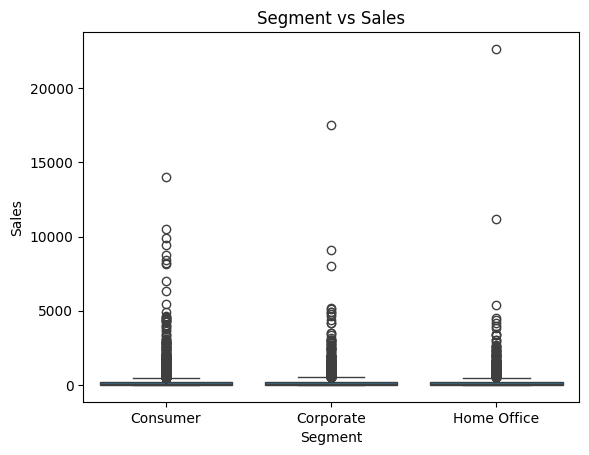

In [20]:
# Box plot for 'Segment' vs 'Sales'
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title('Segment vs Sales')
plt.show()




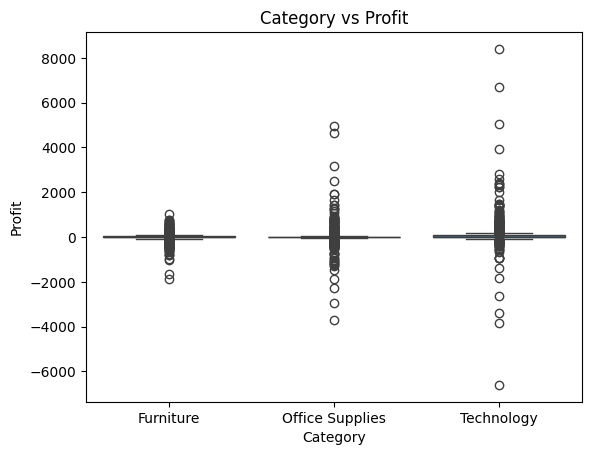

In [21]:
# Box plot for 'Category' vs 'Profit'
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Category vs Profit')
plt.show()

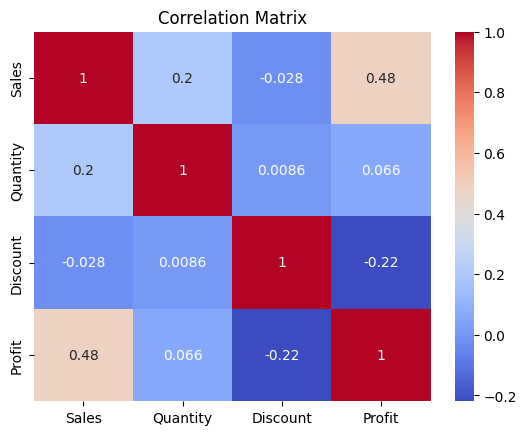

In [22]:
# Correlation matrix
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [23]:
# Export the cleaned data to a new CSV file
df_clean.to_csv('cleaned_file.csv', index=False)
